# Объединение датасетов Vegetables, fruits360, tasty_fruit

Из разведовательных анализов отдельно каждого датасета известно, что:  
- Датасет **Vegetables** - сбалансирован, имеет по 1400 изображений в каждой из 15 категорий.
- Датасет **fruits360** - имеет множество категорий. Многие категории являются подклассами для определенной категории (к примеру, категории разных типов яблок можно отнести к категории "Яблоко").
- Датасет **tasty_fruit** - имеет около 330 изображений для каждой из 10 категорий.

Так как датасет Vegetables уже сбалансирован, то **требуемое количество изображений для категории можно взять 1400**

Принято решение в датасете fruits360 выделить обобщенные категории, из этих категорий выбрать те, которые соответствуют требуемому количеству изображений (в них расположены чаще встречаемые фрукты) и категории, которые можно объединить с категориями из других датасетов.  
Для категорий, в которых будет недостаточно изображений применить oversampling.  
Для категорий, превышающих требуемое количество изображений применить undersampling.

In [ ]:
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from tqdm.auto import tqdm
import shutil

from PIL import Image, ImageEnhance
import random

In [ ]:
FILES_COUNT = 1400
MV_FILES_COUNT = int(FILES_COUNT * 0.4)
RM_FILES_COUNT = FILES_COUNT - MV_FILES_COUNT

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    DRIVE_DIR = os.path.join('/content/drive', 'MyDrive')
except ImportError:
    DRIVE_DIR = os.getcwd()

DATASET_DIR = os.path.join(os.getcwd(), 'dataset')
os.makedirs(DATASET_DIR, exist_ok=True)

Mounted at /content/drive


In [ ]:
# Распаковка архива
with zipfile.ZipFile(os.path.join(DRIVE_DIR,'dataset.zip'), 'r') as zip_ref:
    zip_ref.extractall('./')

# Проверим структуру папок
print(f'{os.listdir(DATASET_DIR)} Начальных категорий')

['Stawberries', 'Walnut 1', 'Pepper Yellow 1', 'Cherry 1', 'Nectarine Flat 1', 'Mangostan 1', 'Cherry Wax Red 1', 'Pear Monster 1', 'Pinenapple', 'Nut Pecan 1', 'Cucumber Ripe 1', 'Huckleberry 1', 'Mango', 'Tomato 3', 'Cantaloupe 2', 'Carrot', 'Apple hit 1', 'Apple Braeburn 1', 'Potato Sweet 1', 'Brinjal', 'Pear Williams 1', 'Cabbage', 'Apple 6', 'Kohlrabi 1', 'Apple', 'Onion Red 1', 'Potato White 1', 'Cantaloupe 1', 'Tomato', 'Cauliflower', 'Grape Blue 1', 'Melon Piel de Sapo 1', 'Plum 2', 'Cucumber 3', 'Dates 1', 'Apple Red 2', 'Watermelon', 'Pear Forelle 1', 'Lemon 1', 'Cherry', 'Mango Red 1', 'Chestnut 1', 'Potato Red Washed 1', 'Tomato Heart 1', 'Grape White 2', 'Peach Flat 1', 'Passion Fruit 1', 'Plum 3', 'Apple Red Yellow 2', 'Onion White 1', 'Onion Red Peeled 1', 'Peach 2', 'Apple Crimson Snow 1', 'Grapefruit Pink 1', 'Maracuja 1', 'Apple Golden 2', 'Orange 1', 'Apple Red Delicious 1', 'Potato Red 1', 'Rambutan 1', 'Tomato 4', 'Lychee 1', 'Avocado ripe 1', 'Pomelo Sweetie 1', '

## Обобщение категорий

Категории из fruits360 имеют число в конце названия, по числу можно отличить от других датасетов

In [ ]:
prev_classes = os.listdir(DATASET_DIR)
classes = []
for cl in prev_classes:
    split_name = cl.split(' ')
    if split_name[0] not in classes:
        classes.append(split_name[0])

print(f'Обобщенных категорий {len(classes)}')
print(f'Изначальных категорий {len(prev_classes)}')


Обобщенных категорий 80
Изначальных категорий 166


После обобщения категорий из fruits360 получилось 80 категорий, было 166

In [ ]:
fruit360_classes = []
prev_sum = 0
for i, cl in tqdm(enumerate(prev_classes)):
    is_fruit360 = re.match(r'.*\s\d+', cl) is not None
    if is_fruit360:
        prev_sum = prev_sum + 1
        cl_name = cl.split(' ')[0]
        cl_path = os.path.join(DATASET_DIR, cl)

        new_cl_name = cl_name+'360'
        new_cl_path = os.path.join(DATASET_DIR, new_cl_name)
        if new_cl_name not in fruit360_classes:
            os.makedirs(new_cl_path, exist_ok=True)
            fruit360_classes.append(new_cl_name)

        for img_name in os.listdir(cl_path):
            file_path = os.path.join(DATASET_DIR, cl_path, img_name)
            new_file_path = os.path.join(DATASET_DIR, new_cl_path, str(i)+'_'+img_name)
            shutil.move(file_path, new_file_path)
        if len(os.listdir(cl_path))> 0:
            print(f"Что-то пошло не так, не все файлы перемещены из папки {cl_path}")
        else:
            os.rmdir(cl_path)

0it [00:00, ?it/s]

In [ ]:
print(f"Было {prev_sum} классов fruits360, стало {len(fruit360_classes)}")

Было 141 классов fruits360, стало 70


Категории из fruits360 удалось сократить примерно в 2 раза при помощи обобщения. Такое обобщение увеличит количество и разнообразие изображений для категорий.

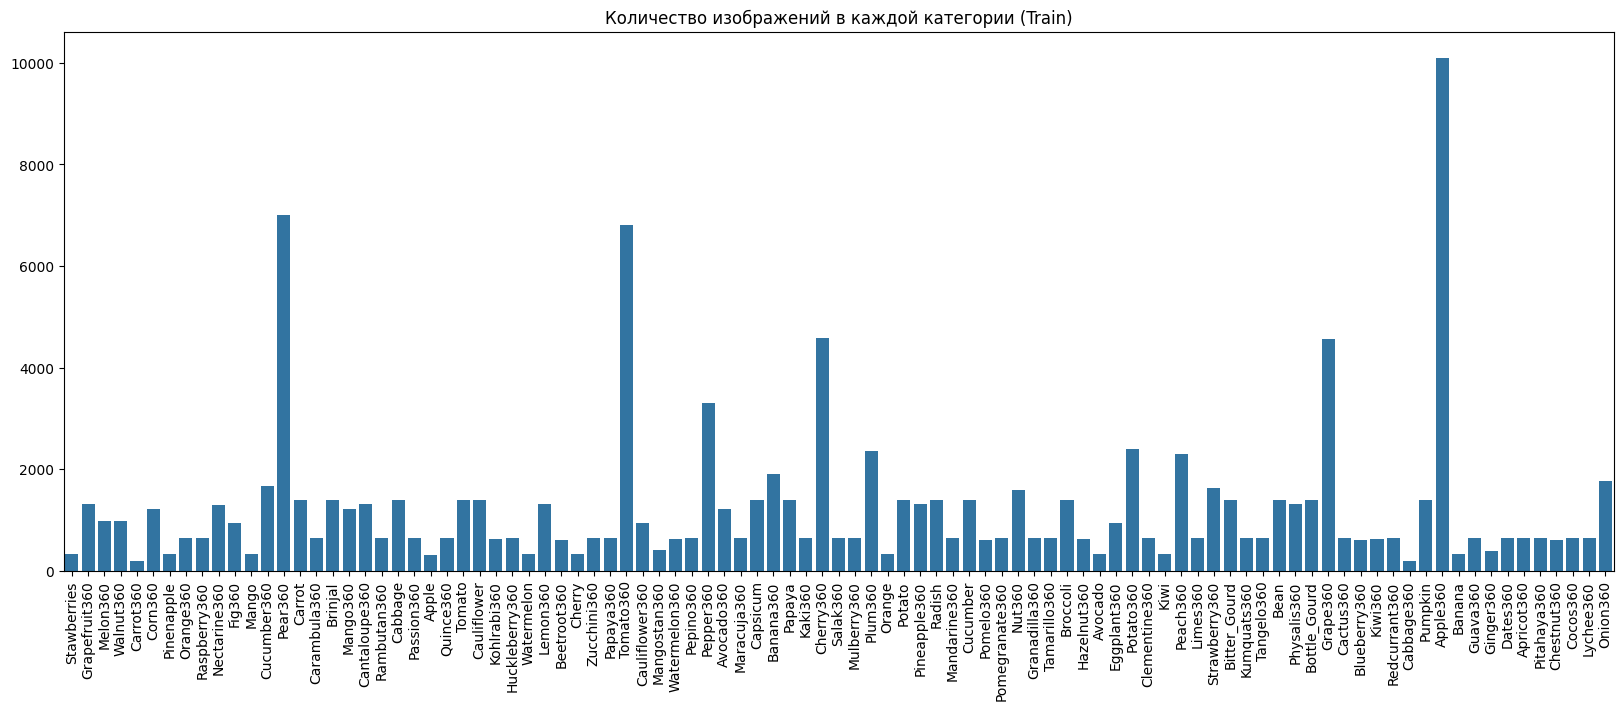

In [ ]:
categories = os.listdir(DATASET_DIR)
category_counts = {category: len(os.listdir(os.path.join(DATASET_DIR, category))) for category in categories}

plt.figure(figsize=(20, 7))
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()))
plt.xticks(rotation=90)
plt.title('Количество изображений в каждой категории (Train)')
plt.show()

Пока что категории из fruits360, пересекающиеся с категориями из других датасетов, не объеденены. Датасет получается с большим количеством категорий и несбалансированным.  
Можно убрать непопулярные категории с экзотическими фруктами и объединить повторяющиеся категории.

In [ ]:
to_merge = []
to_add = []
others = []
dirs = np.array(os.listdir(DATASET_DIR))
for cl in fruit360_classes:
    if cl[0:-3] in dirs:
        to_merge.append(cl)
    elif len(os.listdir(os.path.join(DATASET_DIR, cl))) > FILES_COUNT:
        to_add.append(cl)
    else:
        others.append(cl)

print(f'Новых категорий из fruits360: {len(to_add)}')
print(f'Категорий для объединения из fruits360: {len(to_merge)}')
print(f'Категорий с малым количеством данных fruits360: {len(others)}')

Новых категорий из fruits360: 8
Категорий для объединения из fruits360: 15
Категорий с малым количеством данных fruits360: 47


Категории с малым количеством данных fruits360 отбросим, т.к. в них представлены фото немногочисленного количества фруктов (~1-3) под разным углом.

In [ ]:
# Сохранение промежуточного результата
INTER_ZIP_PATH = os.path.join(DRIVE_DIR,'inter_dataset')
shutil.make_archive(INTER_ZIP_PATH, 'zip', DATASET_DIR)
print(f'Промежуточный этап сохранен в {INTER_ZIP_PATH}')

Промежуточный этап сохранен в /content/drive/MyDrive/inter_dataset


## Балансировка изображений в категориях, удаление лишних категорий

Для oversampling используется:
- поворот изображения на определенный градус
- изменение яркости изображения
- изменение контрастности изображения
- отзеркаливание изображения

In [ ]:
def rotate_img(img, angle)  -> Image:
  img_rotated = img.rotate(angle, fillcolor=(255, 255, 255))
  return img_rotated

def brightness_img(img, brightness_coeff)  -> Image:
  enhancer = ImageEnhance.Brightness(img)
  img_brightened = enhancer.enhance(brightness_coeff)
  return img_brightened.convert('RGB')

def contrasted_img(img, contrast_coeff)  -> Image:
  enhancer = ImageEnhance.Contrast(img)
  img_contrasted  = enhancer.enhance(contrast_coeff)
  return img_contrasted.convert('RGB')

def transpose_img(img) -> Image:
    img_transposed = img.transpose(Image.FLIP_LEFT_RIGHT)
    return img_transposed


Для undersampling будут выбраны случайные изображения для удаления  
Oversampling использует вышеперечисленные методы

In [ ]:
def save_if_not_exist(file_path, img:Image):
    if os.path.exists(file_path) == False:
        img.save(file_path)
        return True
    return False

def add_new_images(dir_path, filename, prev_count, max_count):
    img = Image.open(os.path.join(dir_path, filename))
    if img.mode != 'RGB':
        img= img.convert('RGB')
    br = round(random.uniform(0.5, 1.5), 2)
    while br == 1:
        br = round(random.uniform(0.5, 1.5), 2)
    br_img = brightness_img(img, br)
    if save_if_not_exist(os.path.join(dir_path, f'br{br}_{filename}'), br_img):
      prev_count=prev_count+1
    if prev_count == max_count:
        return prev_count
    deg = random.randint(1, 359)
    deg_img = rotate_img(img, deg)
    if save_if_not_exist(os.path.join(dir_path, f'deg{deg}_{filename}'), deg_img):
      prev_count=prev_count+1
    if prev_count == max_count:
        return prev_count
    contr = round(random.uniform(0.5, 1.5), 2)
    while contr == 1:
        contr = round(random.uniform(0.5, 1.5), 2)
    contr_img = contrasted_img(img, contr)
    if save_if_not_exist(os.path.join(dir_path, f'contr{contr}_{filename}'), contr_img):
        prev_count=prev_count+1
    return prev_count


def oversampling_images(dir_path, max_count):
    files = os.listdir(dir_path)
    count = len(files)
    if count > 0:
        while count < max_count:
            for f in files:
                count = add_new_images(dir_path, f, count, max_count)
                if count == max_count:
                    break
                img = Image.open(os.path.join(dir_path, f)).copy()
                if img.mode != 'RGB':
                    img= img.convert('RGB')
                tr_img = transpose_img(img)
                if save_if_not_exist(os.path.join(dir_path, f'transp_{f}'), tr_img):
                    count = count + 1
                count = add_new_images(dir_path, f'transp_{f}', count, max_count)
                if count == max_count:
                    break

def undersampling_images(dir_path, max_count):
    files = os.listdir(dir_path)
    count = len(files)
    if count > max_count:
        files_to_remove = random.sample(files, count-max_count)
        for f in files_to_remove:
            rm_path = os.path.join(dir_path, f)
            if os.path.exists(rm_path):
                os.remove(rm_path)
            else:
                print('Файл {rm_path} не найден')

In [ ]:
# Добавляет категорию с указанным к-вом файлов
def add_category(prev_path, new_path):
    # Из условия: всегда больше FILES_COUNT, поэтому выполняется undersampling_images
    file_count = len(os.listdir(prev_path))
    print(f'В {prev_path} {file_count} файлов для добавления, undersampling')
    undersampling_images(prev_path, FILES_COUNT)
    os.rename(prev_path, new_path)


# Объединяет категории
def merge_categories(path_to_move, path_to_remove):

    # Для файлов, которые будут удалены из конечной папки
    files_to_remove = []
    file_count = len(os.listdir(path_to_move))
    # Если файлов меньше константы, то увеличить число до максимального, файлы не удаляются
    # Иначе удалить из папки ({кв-о файлов} - {макс. число})
    if file_count < RM_FILES_COUNT:
        oversampling_images(path_to_move, RM_FILES_COUNT)
        print(f'В {path_to_move} {file_count} файлов для объединения, Увеличилось до {len(os.listdir(path_to_move))}')
    elif file_count > RM_FILES_COUNT:
        rm_count = len(os.listdir(path_to_move))
        files_to_remove=random.sample(os.listdir(path_to_move), rm_count - RM_FILES_COUNT)
        print(f'В {path_to_move} {file_count} файлов для объединения. Следует удалить {len(files_to_remove)}')

    # Для файлов, которые будут перенесены из удаляемой папки
    files_to_move = []
    file_count = len(os.listdir(path_to_remove))
    #
    if file_count < MV_FILES_COUNT:
        oversampling_images(path_to_remove, MV_FILES_COUNT)
        print(f'В {path_to_remove} {file_count} файлов для объединения. Осталось: {len(os.listdir(path_to_remove))} для перенесения')
    elif file_count > MV_FILES_COUNT:
        files_to_move = random.sample(os.listdir(path_to_remove), MV_FILES_COUNT)
        print(f'В {path_to_remove} {file_count} файлов для объединения. Взято: {len(files_to_move)} для перенесения')
    else:
        files_to_move = os.listdir(path_to_remove)
        print(f'В {path_to_remove} {file_count} файлов для объединения. Все: {len(files_to_move)} для перенесения')

    # Перемещение файлов
    for f in files_to_move:
        # Переместить файл из первого (удаляемого) во второй (конечный) путь
        shutil.move(os.path.join(path_to_remove, f), os.path.join(path_to_move, f))
    shutil.rmtree(path_to_remove)
    # Удаление файлов
    for f in files_to_remove:
        os.remove(os.path.join(path_to_move, f))

In [ ]:
for cl in tqdm(to_add):
    current_dir = os.path.join(DATASET_DIR, cl)
    new_dir = os.path.join(DATASET_DIR, cl[0:-3])
    add_category(current_dir, new_dir)

for cl in tqdm(to_merge):
    path_to_move = os.path.join(DATASET_DIR, cl[0:-3])
    path_to_remove = os.path.join(DATASET_DIR, cl)
    merge_categories(path_to_move, path_to_remove)

for cl in tqdm(others):
    shutil.rmtree(os.path.join(DATASET_DIR, cl))
    print(f'{cl} убрана')

for cl in tqdm(os.listdir(DATASET_DIR)):
    current_dir = os.path.join(DATASET_DIR, cl)
    file_count = len(os.listdir(current_dir))
    if os.path.exists(current_dir) and file_count < FILES_COUNT:
        print(f'В {cl} {file_count} файлов, oversampling')
        oversampling_images(current_dir, FILES_COUNT)

  0%|          | 0/8 [00:00<?, ?it/s]

В /content/dataset/Pepper360 3304 файлов для добавления, undersampling
В /content/dataset/Pear360 7013 файлов для добавления, undersampling
В /content/dataset/Nut360 1584 файлов для добавления, undersampling
В /content/dataset/Onion360 1779 файлов для добавления, undersampling
В /content/dataset/Grape360 4565 файлов для добавления, undersampling
В /content/dataset/Plum360 2364 файлов для добавления, undersampling
В /content/dataset/Peach360 2296 файлов для добавления, undersampling
В /content/dataset/Strawberry360 1640 файлов для добавления, undersampling


  0%|          | 0/15 [00:00<?, ?it/s]

В /content/dataset/Cherry 335 файлов для объединения, Увеличилось до 840
В /content/dataset/Cherry360 4592 файлов для объединения. Взято: 560 для перенесения
В /content/dataset/Cucumber 1400 файлов для объединения. Следует удалить 560
В /content/dataset/Cucumber360 1671 файлов для объединения. Взято: 560 для перенесения
В /content/dataset/Tomato 1400 файлов для объединения. Следует удалить 560
В /content/dataset/Tomato360 6810 файлов для объединения. Взято: 560 для перенесения
В /content/dataset/Apple 319 файлов для объединения, Увеличилось до 840
В /content/dataset/Apple360 10104 файлов для объединения. Взято: 560 для перенесения
В /content/dataset/Potato 1400 файлов для объединения. Следует удалить 560
В /content/dataset/Potato360 2404 файлов для объединения. Взято: 560 для перенесения
В /content/dataset/Mango 335 файлов для объединения, Увеличилось до 840
В /content/dataset/Mango360 1224 файлов для объединения. Взято: 560 для перенесения
В /content/dataset/Orange 327 файлов для объе

  0%|          | 0/47 [00:00<?, ?it/s]

Walnut360 убрана
Nectarine360 убрана
Mangostan360 убрана
Huckleberry360 убрана
Cantaloupe360 убрана
Kohlrabi360 убрана
Melon360 убрана
Dates360 убрана
Lemon360 убрана
Chestnut360 убрана
Passion360 убрана
Grapefruit360 убрана
Maracuja360 убрана
Rambutan360 убрана
Lychee360 убрана
Pomelo360 убрана
Corn360 убрана
Fig360 убрана
Clementine360 убрана
Cocos360 убрана
Kaki360 убрана
Physalis360 убрана
Pineapple360 убрана
Raspberry360 убрана
Cactus360 убрана
Mandarine360 убрана
Apricot360 убрана
Eggplant360 убрана
Kumquats360 убрана
Ginger360 убрана
Pepino360 убрана
Redcurrant360 убрана
Blueberry360 убрана
Beetroot360 убрана
Quince360 убрана
Pomegranate360 убрана
Zucchini360 убрана
Tangelo360 убрана
Pitahaya360 убрана
Salak360 убрана
Tamarillo360 убрана
Limes360 убрана
Guava360 убрана
Carambula360 убрана
Hazelnut360 убрана
Granadilla360 убрана
Mulberry360 убрана


  0%|          | 0/33 [00:00<?, ?it/s]

В Stawberries 333 файлов, oversampling
В Pinenapple 335 файлов, oversampling
В Carrot 840 файлов, oversampling
В Cabbage 840 файлов, oversampling


In [ ]:
categories = os.listdir(DATASET_DIR)
category_counts = {category: len(os.listdir(os.path.join(DATASET_DIR, category))) for category in categories}

Убедиться, что категории отработали заданные действия

In [ ]:
vegetables = ['Bitter_Gourd',
 'Potato',
 'Broccoli',
 'Tomato',
 'Pumpkin',
 'Bottle_Gourd',
 'Carrot',
 'Cucumber',
 'Papaya',
 'Radish',
 'Brinjal',
 'Capsicum',
 'Cabbage',
 'Bean',
 'Cauliflower']

for cl in category_counts:
    m = f'{cl}360' in to_merge
    a = f'{cl}360' in to_add
    v = cl in vegetables
    print(f'{cl}:\n  merge: {m}\n  add: {a}\n  vegetables: {v}\n')

print(f'Категорий: {len(category_counts)}')

Stawberries:
  merge: False
  add: False
  vegetables: False

Pear:
  merge: False
  add: True
  vegetables: False

Pinenapple:
  merge: False
  add: False
  vegetables: False

Mango:
  merge: True
  add: False
  vegetables: False

Carrot:
  merge: True
  add: False
  vegetables: True

Brinjal:
  merge: False
  add: False
  vegetables: True

Cabbage:
  merge: True
  add: False
  vegetables: True

Apple:
  merge: True
  add: False
  vegetables: False

Tomato:
  merge: True
  add: False
  vegetables: True

Cauliflower:
  merge: True
  add: False
  vegetables: True

Nut:
  merge: False
  add: True
  vegetables: False

Watermelon:
  merge: True
  add: False
  vegetables: False

Cherry:
  merge: True
  add: False
  vegetables: False

Capsicum:
  merge: False
  add: False
  vegetables: True

Papaya:
  merge: True
  add: False
  vegetables: True

Orange:
  merge: True
  add: False
  vegetables: False

Potato:
  merge: True
  add: False
  vegetables: True

Radish:
  merge: False
  add: False
 

## Просмотр подготовленного датасета

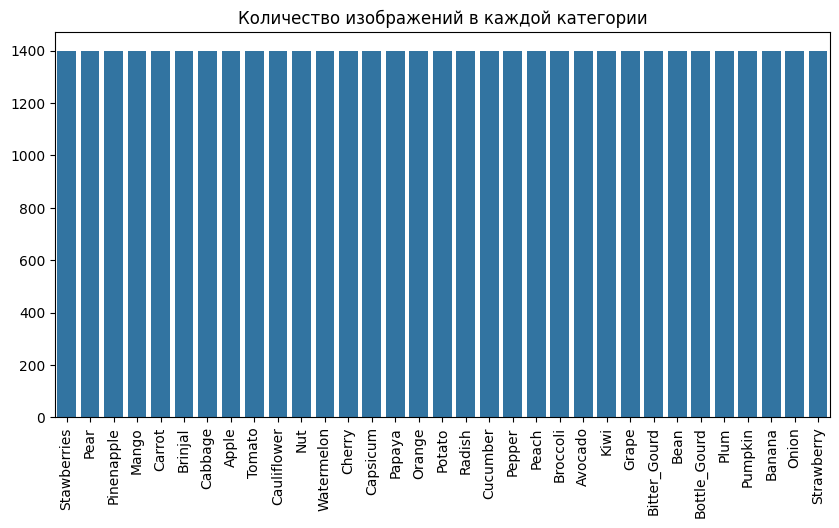

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()))
plt.xticks(rotation=90)
plt.title('Количество изображений в каждой категории')
plt.show()

**Получился сбалансированный датасет, содержащий 33 категории по 1400 изображений в каждой.**

In [ ]:
# Функция для отображения нескольких изображений из категории
def show_images(folder_path, category, num_images=5):
    image_files = random.sample(os.listdir(folder_path), num_images)

    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(image_files):
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path)

        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.title(category)
        plt.axis('off')
    plt.show()

for category in categories:
    folder_path = os.path.join(DATASET_DIR, category)
    show_images(folder_path, category)

In [ ]:
zip_path = os.path.join(DRIVE_DIR,'final_dataset')
shutil.make_archive(zip_path, 'zip', DATASET_DIR)
print(f'Финальный датасет сохранен в {zip_path}')

Финальный датасет сохранен в /content/drive/MyDrive/final_dataset
